In [182]:
import pandas as pd
import numpy as np

In [183]:
df = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')


df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


# Data Pre-processing

In [184]:
df.shape

(4009, 12)

In [185]:
df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [186]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [187]:
df['fuel_type'] = df['fuel_type'].fillna('Unknown')
df['accident']=df['accident'].fillna('None reported')


In [188]:
total_count = df['clean_title'].count()
probabilities = {category: count / total_count for category, count in df['clean_title'].value_counts().items() if pd.notnull(category)}

# Fill missing values with probability weighting
filled_values = np.random.choice(list(probabilities.keys()), size=df['clean_title'].isnull().sum(), p=list(probabilities.values()))
df.loc[df['clean_title'].isnull(), 'clean_title'] = filled_values


In [189]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [190]:
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(float)

In [191]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Yes,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,"$34,999"


In [192]:
# Extracting the number of accidents
def extract_num_accidents(text):
    if isinstance(text, str):
        if 'accident' in text and 'reported' in text:
            try:
                return int(text.split()[2])
            except (IndexError, ValueError):
                return 1  # Default to 1 if the exact number is not clear
    return 0

df['num_accidents'] = df['accident'].apply(extract_num_accidents)



# Extracting engine size
df['engine_size'] = df['engine'].str.extract(r'(\d+(\.\d+)?)L')[0].astype(float)

# Converting 'price' to numerical value without currency symbol and commas
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [193]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,num_accidents,engine_size
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,1,3.7
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,1,3.8
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Yes,54598.0,0,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,34999.0,0,2.0


In [194]:
df.drop(['engine', 'accident'], axis=1, inplace=True)


In [195]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type          0
transmission       0
ext_col            0
int_col            0
clean_title        0
price              0
num_accidents      0
engine_size      377
dtype: int64

In [196]:
mean_engine_size = df['engine_size'].mean()

# Fill NaN values in 'engine_size' column with the calculated mean
df['engine_size'] = df['engine_size'].fillna(mean_engine_size)

In [197]:
df.isnull().sum()

brand            0
model            0
model_year       0
milage           0
fuel_type        0
transmission     0
ext_col          0
int_col          0
clean_title      0
price            0
num_accidents    0
engine_size      0
dtype: int64

In [198]:
df.dtypes

brand             object
model             object
model_year         int64
milage           float64
fuel_type         object
transmission      object
ext_col           object
int_col           object
clean_title       object
price            float64
num_accidents      int64
engine_size      float64
dtype: object

In [199]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,num_accidents,engine_size
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,Yes,10300.0,1,3.700000
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005.0,1,3.800000
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,Yes,54598.0,0,3.709045
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,Yes,15500.0,0,3.500000
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,Yes,34999.0,0,2.000000


In [200]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'brand' and 'model' columns
df['brand'] = label_encoder.fit_transform(df['brand'])
df['model'] = label_encoder.fit_transform(df['model'])

In [201]:
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['ext_col'] = label_encoder.fit_transform(df['ext_col'])
df['int_col'] = label_encoder.fit_transform(df['int_col'])

In [202]:
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['clean_title'] = label_encoder.fit_transform(df['clean_title'])
df['price'] = label_encoder.fit_transform(df['price'])
df['milage'] = label_encoder.fit_transform(df['milage'])

In [203]:
df['milage']=df['milage'].astype('int64')

In [204]:
df['price']=df['price'].astype('int64')
df['engine_size']=df['engine_size'].astype('int64')

In [205]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,num_accidents,engine_size
0,14,1743,2013,1456,1,16,29,14,0,141,1,3
1,19,1182,2021,1109,2,32,185,71,0,760,1,3
2,27,1325,2022,770,2,40,38,14,0,1059,0,3
3,20,1242,2015,2073,3,23,29,14,0,254,0,3
4,3,1225,2021,374,2,32,120,14,0,690,0,2


In [206]:
df.dtypes

brand            int64
model            int64
model_year       int64
milage           int64
fuel_type        int64
transmission     int64
ext_col          int64
int_col          int64
clean_title      int64
price            int64
num_accidents    int64
engine_size      int64
dtype: object

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


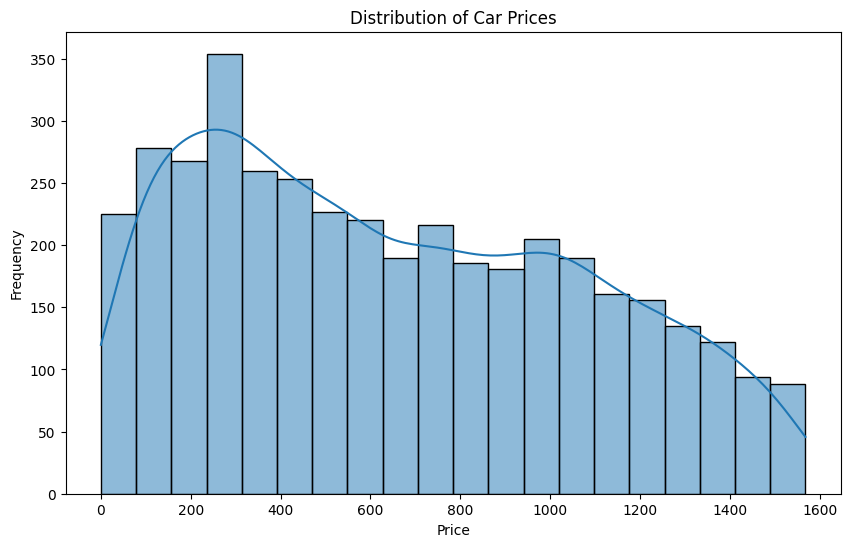

In [208]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

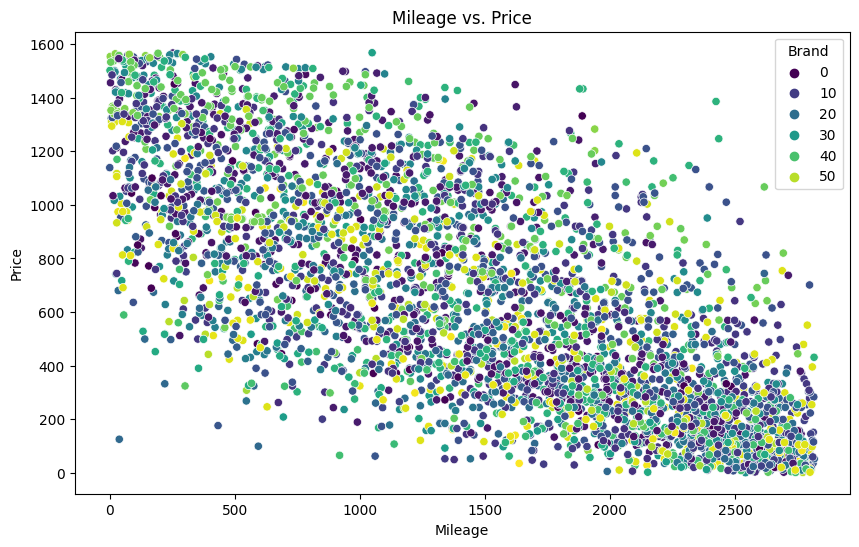

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', data=df, hue='brand', palette='viridis')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Brand')
plt.show()

In [210]:
# # Grouping model years into five-year intervals
# df['model_year_group'] = pd.cut(df['model_year'], 
#                                  bins=np.arange(df['model_year'].min(), df['model_year'].max() + 6, 5),
#                                  right=False)

# # Plotting the box plot with grouped model years
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='model_year_group', y='price', data=df)
# plt.title('Box Plot of Prices by Model Year Group')
# plt.xlabel('Model Year Group')
# plt.ylabel('Price')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()

# # Dropping the temporary column
# df.drop('model_year_group', axis=1, inplace=True)


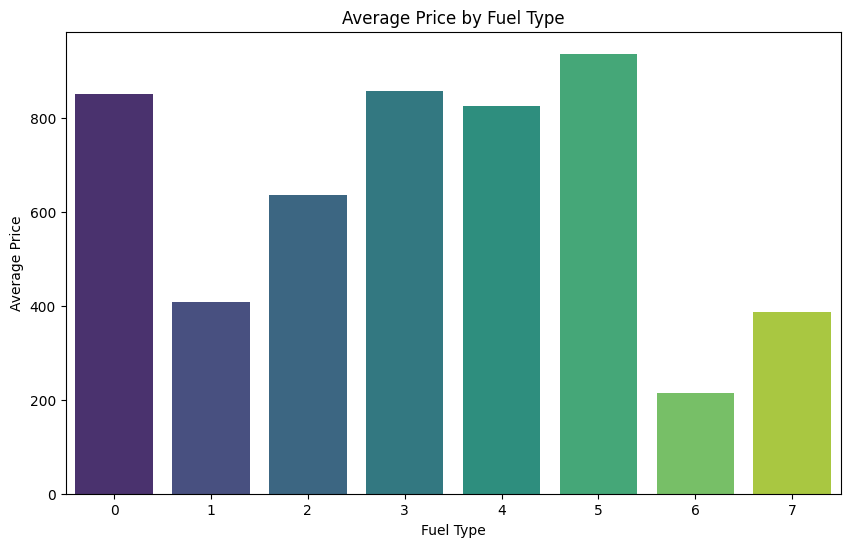

In [211]:
plt.figure(figsize=(10, 6))
avg_price_by_fuel = df.groupby('fuel_type')['price'].mean().reset_index()
sns.barplot(x='fuel_type', y='price', data=avg_price_by_fuel, palette='viridis')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

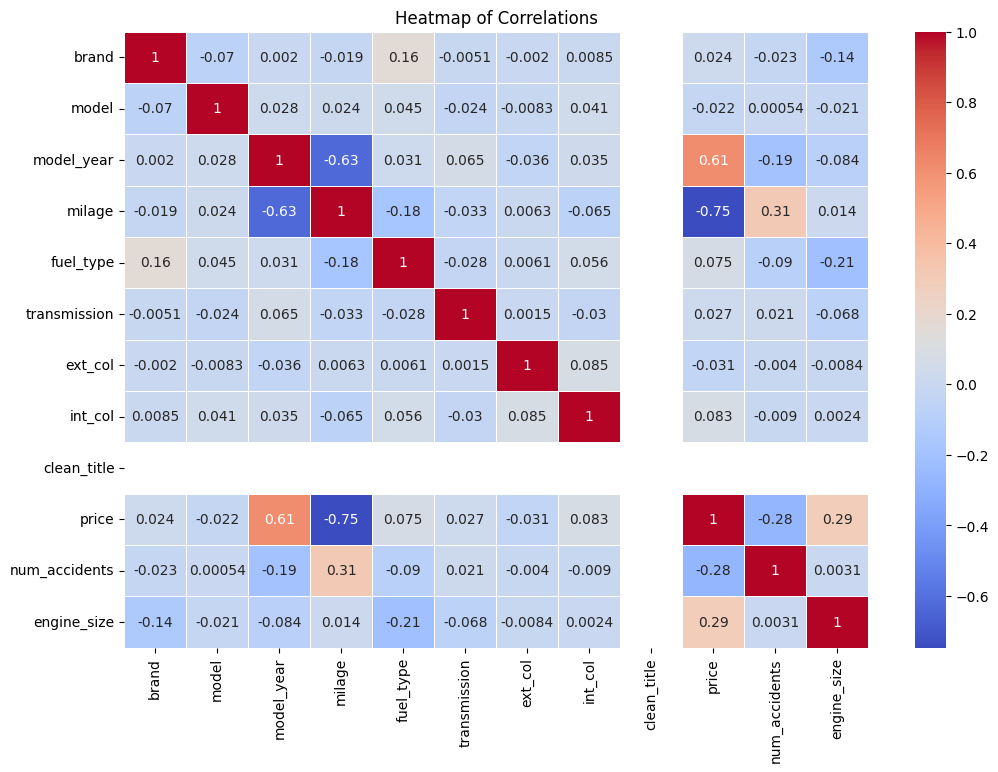

In [212]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

In [213]:
x = df.drop(columns=['price'])
y=df['price']


In [214]:
from sklearn.model_selection import train_test_split

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [217]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [218]:
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [219]:
rf_model.score(x_test,y_test)

0.8073015391805043

In [220]:
rf_model.score(x_train,y_train)

0.9732420139095853

In [221]:
y_pred = rf_model.predict(x_test)

In [222]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 34481.0251382793
Mean Absolute Error: 136.92382793017458
R-squared: 0.8073015391805043


In [228]:
predicted_prices_df = pd.DataFrame({'price': y_pred})

# Step 2: Save the DataFrame to a CSV file
predicted_prices_df.to_csv('prices.csv', index=False)

print("Predicted prices saved to prices.csv")

Predicted prices saved to prices.csv


In [231]:
import pandas as pd

# Assuming 'y_pred' contains the predicted prices

# Step 1: Create a DataFrame with predicted prices and index as ID
predicted_prices_df = pd.DataFrame({'id': range(len(y_pred)), 'price': y_pred})

# Step 2: Save the DataFrame to a CSV file
predicted_prices_df.to_csv('price.csv', index=False)

print("Predicted prices with auto-generated IDs saved to price.csv")


Predicted prices with auto-generated IDs saved to price.csv
